# Predicting Thalassemia (Heart Disease) #

**[Github Repo](https://github.com/AnishkaFP/dsci-100-2023w1-group-029)**

### Goup Details ###
Group Number: 008-29
### Members: 
- Ishaan Chakrabarty
- Anishka Fernandopulle
- Milan Wiertz
- Molly Jiang

## Introduction ## 
The topic aims to show the presence of heart disease in individuals, depending on various factors. The study specifically focuses on the Thalassemia heart disease, which is a blood disorder that causes your body to have too little hemoglobin, which is what enables red blood cells to carry oxygen.

### Goal: ###
Our project will seek to predict heart disease in patients based on their performance in a series of easily accessible metrics with the intent of identifying patients that are likely to be affected early for further testing. 

## Methodology ##

### Describing the Data ###

To do so, we will make use of a [simplified version](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) of a [dataset by UC Irvine](https://archive.ics.uci.edu/dataset/45/heart+disease).

The dataset contains 12 metrics regarding patients that were diagnosed (or not) with Thalassemia, as well as an indication of whether they developed the disease (target) and whether such development was reversible or fixed (thal). The data includes biographical information such as the sex and age of the patient, results of medical tests as well as analysis of test results (eg. whether the electrocardiogram presented any abnormalities).

Hereby each variable as well as their coding in the dataset, a description and variable types:


| Variable                           | Coding   | Description                                                 | Type          |
|------------------------------------|----------|-------------------------------------------------------------|---------------|
| Age                                | age      | Age of the patient                                         | Integer       |
| Sex                                | sex      | Sex of the patient  (0=female, 1=male)                     | Categorical, 0-1 |
| Chest pain type                    | cp       | Type of patient pain (0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic)         | Categorical, 0-3 |
| Resting blood pressure (mmHg)      | trestbps | Blood pressure of the patient at rest                       | Integer       |
| Serum cholesterol in mg/dl         | chol     | Cholesterol level in the patient                            | Integer       |
| Fasting blood sugar > 120 mg/dl    | fbs      | Is the blood sugar level of the patient above 120 mg/dl? (0=no, 1=yes)  | Categorical, 0-1 |
| Resting electrocardiographic results | restecg  | EC result (0=regular, 1=abnormal, 2=hypertrophy)             | Categorical, 0-2 |
| Maximum heart rate achieved (bpm)  | thalach  | Heart rate achieved during exercise                          | Integer       |
| Exercise induced angina             | exang    | Did the patient suffer from angina due to exercise? (0=no, 1=yes)        | Categorical, 0-1 |
| ST depression                      | oldpeak  | ST depression induced by exercise relative to rest on the electrocardiogram | Numeric |
| ST Slope                           | slope    | The slope of the peak exercise ST segment (0=upsloping, 1=flat 2=downsloping)| Categorical, 0-2 |
| Major vessels                      | ca       | Number of major vessels colored by fluoroscopy              | Integer       |
| Thalassemia                        | thal     | Type of Thalassemia (0=not affected, 1=fixed, 2=reversible)   |Categorical, 0-2 |
| Target                             | target   | Presence of Thalassemia (0=no, 1=yes)                | Categorical, 0-1 |


## Discussion ##

## Preliminary Exploratory Data Analysis ##

### Load R Library ###

In [1]:
# load packages
library(tidyverse)
library(dplyr)
library(tidymodels)
library(ggplot2)

# set the seed
set.seed(123)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

## Read in the Data Set ##

In [2]:
# read data
heart_data_raw <- read_csv("heart.csv")
head(heart_data_raw)

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


## Clean and Wrangle into Tidy Format ##

In [3]:
# Check for Missing values
missing_values <- colSums(is.na(heart_data_raw))
print(data.frame(missing_values))

         missing_values
age                   0
sex                   0
cp                    0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalach               0
exang                 0
oldpeak               0
slope                 0
ca                    0
thal                  0
target                0


**The table above reveals that the data set is free from any missing values.**

In [4]:
# check the variable types of each column
variable_types0 <- sapply(heart_data_raw, class)
print(data.frame(variable_types0))

         variable_types0
age              numeric
sex              numeric
cp               numeric
trestbps         numeric
chol             numeric
fbs              numeric
restecg          numeric
thalach          numeric
exang            numeric
oldpeak          numeric
slope            numeric
ca               numeric
thal             numeric
target           numeric


In [5]:
# mutate the data type for categorical variables as factor
heart_data_raw <- heart_data_raw |> 
                  mutate_at(vars(sex, cp, fbs, restecg, exang, slope, thal, target), as_factor)
# check the data type of mutated data
variable_types1 <- sapply(heart_data_raw, class)
print(data.frame(variable_types1))

         variable_types1
age              numeric
sex               factor
cp                factor
trestbps         numeric
chol             numeric
fbs               factor
restecg           factor
thalach          numeric
exang             factor
oldpeak          numeric
slope             factor
ca               numeric
thal              factor
target            factor


**The initial data set has been transformed into a tidy format.**

### Select Numeric Variables for the Model Analysis ###

In [6]:
# select numeric variables and the target column
heart_data <- heart_data_raw |>
              select(age, trestbps, chol, thalach, oldpeak, ca, target)
head(heart_data)

age,trestbps,chol,thalach,oldpeak,ca,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,125,212,168,1.0,2,0
53,140,203,155,3.1,0,0
70,145,174,125,2.6,0,0
61,148,203,161,0.0,1,0
62,138,294,106,1.9,3,0
58,100,248,122,1.0,0,1


### Keep the Categorical Variable Separately for Data Exploratory Visualization ###

In [7]:
# select categorical variables and the target column
heart_data_cat <- heart_data_raw |>
                  select(sex, cp, fbs, restecg, exang, slope, thal, target)
head(heart_data_cat)

sex,cp,fbs,restecg,exang,slope,thal,target
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,1,0,2,3,0
1,0,1,0,1,0,3,0
1,0,0,1,1,0,3,0
1,0,0,1,0,2,3,0
0,0,1,1,0,1,2,0
0,0,0,0,0,1,2,1


### Split the Data Set into Training Set and Testing Set ###

In [8]:
# split the data set
heart_split <- initial_split(heart_data, prop = 0.75, strata = target)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

### Summarize the Data Set Using the Training Data ###

In [9]:
# summarize the mean
mean_table <- heart_train |>
                 group_by(target) |>
                 summarize_all(
                     list(mean = mean,
                          sd = sd),
                     na.rm = TRUE)

# count the target column
count_table <- heart_train |>
               count(target)

count_table <- select(count_table, n)

# combine two tables together
summary_table <- bind_cols(mean_table, count_table)

summary_table

target,age_mean,trestbps_mean,chol_mean,thalach_mean,oldpeak_mean,ca_mean,age_sd,trestbps_sd,chol_sd,thalach_sd,oldpeak_sd,ca_sd,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,56.58556,134.2674,252.0027,139.8957,1.5767380,1.211230,7.724610,18.53952,50.55624,22.30323,1.3066828,1.0437004,374
1,52.59898,128.6447,243.2081,158.7614,0.5459391,0.357868,9.612947,16.06778,52.10771,19.14187,0.7354673,0.8568547,394


### Visualization of the Training Data Set ###

In [ ]:
library(ggplot2)
install.packages("GGally")
library(GGally)

plot_matrix <- ggpairs(
  heart_data,
  aes(color = target),
  lower = list(continuous = "points", combo = "facetdensity"),
  diag = list(continuous = "density"),
  title = "Scatterplot Matrix with Color by Target"
)

plot_matrix

## Forward Selection ##

Forward Selection will allow us to determine the predictors that result in the highest level of accuracy 

In [21]:
head(heart_data)
names <- colnames(heart_data |> select(-target))
head(names)

#target will be separated from predictors with "~" and individual predictors separated by "+"
formula <- paste("target", "~", paste(names, collapse = "+"))
formula

age,trestbps,chol,thalach,oldpeak,ca,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,125,212,168,1.0,2,0
53,140,203,155,3.1,0,0
70,145,174,125,2.6,0,0
61,148,203,161,0.0,1,0
62,138,294,106,1.9,3,0
58,100,248,122,1.0,0,1


[1] "age"      "trestbps" "chol"     "thalach"  "oldpeak"  "ca"

[1] "target ~ age+trestbps+chol+thalach+oldpeak+ca"

In [22]:
install.packages("kknn")
library(kknn)

# creates an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# creates a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
heart_vfold <- vfold_cv(heart_data, v = 5, strata = target)

# stores the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("target", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_recipe <- recipe(as.formula(model_string), 
                                data = heart_data) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(heart_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



size,model_string,accuracy
<int>,<chr>,<dbl>
1,target ~ chol,0.7677454
2,target ~ chol+thalach,0.9805067
3,target ~ chol+thalach+trestbps,0.9941462
4,target ~ chol+thalach+trestbps+age,0.9970732
5,target ~ chol+thalach+trestbps+age+oldpeak,0.9912052
6,target ~ chol+thalach+trestbps+age+oldpeak+ca,0.9941463


## Accuracy Plot from Forward Selection ##

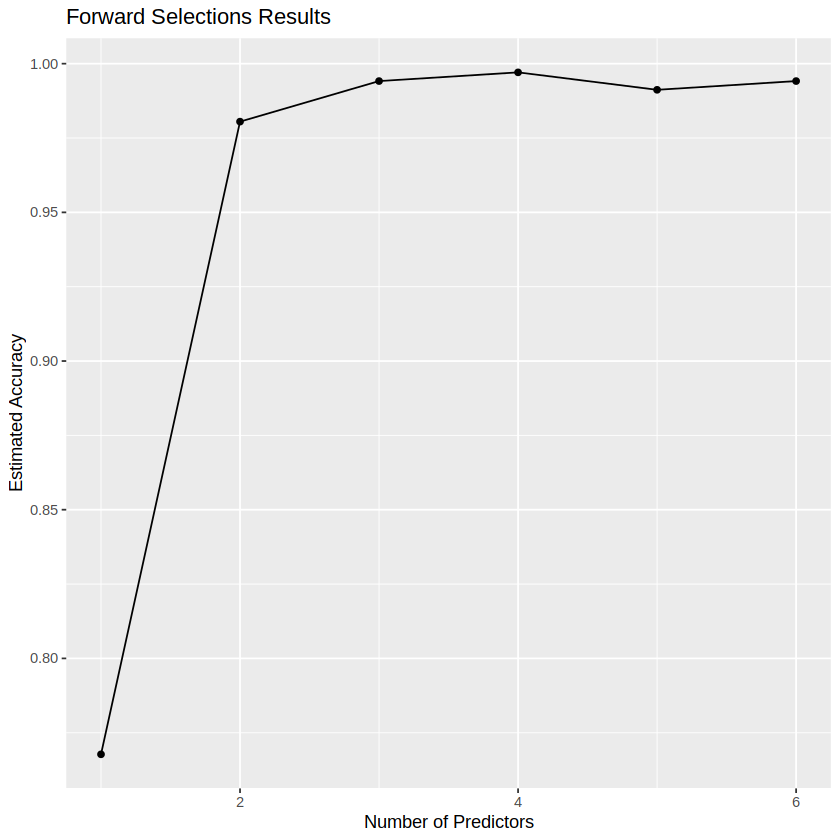

In [24]:
accuracy_plot <- accuracies |>
ggplot(aes(x = size, y = accuracy)) +
geom_line() +
geom_point() +
labs(x = "Number of Predictors", y = "Estimated Accuracy") +
ggtitle("Forward Selections Results") 

accuracy_plot

From the forward selection, we can see that the six predictors we chose result in a very high accuracy, and we do not need to remove any of them. 

## References ##

Janosi, Andras, William Steinbrunn, Matthias Pfisterer, and Robert Detrano. “Heart Disease.” UCI Machine Learning Repository, June 30, 1988. Kaggle. https://doi.org/10.24432/C52P4X.
